___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 10 - <font color="red">Eduardo Tirta e Vitória Camilo - Engenharia 2C</font> 

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import itertools #importante para gerar todos os resultados possíveis!!


___
## <font color='blue'>Exercício 3</font> 
### <font color='red'>**Check para dia 13/09 em DUPLA **</font>

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

1. A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 
    1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade. Interprete-os.
    2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição Binomial estão satisfeitas para o problema aqui me questão.
    
    **Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens!**
    3. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade quando $n=14$ e $p=0,10$. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando o método `stats.binom.stats` e via resultado da Tabela 4.4 do Magalhães e Lima (pág. 125).
    4. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. Para isso, tem-se, por exemplo, as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
        - A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Vide Figura 3.4 do livro Magalhães e Lima (pág. 87). Ou seja, essa opção contrasta a frequência relativa em um valor de $y$ e a probabilidade pontual $P(Y=y)$.
        - A segunda contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.
    Construa os gráficos de acordo com as duas opções e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!
    5. Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?
    6. Considerando apenas os carros populares, o modelo Binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

In [3]:
import os
import numpy as np
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')

Esperamos trabalhar no diretório
C:\Users\Vitória\Documents\GitHub\CD\aula10


In [4]:
carros.describe()

,Tipo,Quantidade
count,3000.00000,3000.000000
mean,1.40000,1.371333
std,0.48998,1.256969
min,1.00000,0.000000
25%,1.00000,0.000000
50%,1.00000,1.000000
75%,2.00000,2.000000
max,2.00000,8.000000


In [5]:
carros.Tipo = carros.Tipo.astype('category')
carros.Tipo.cat.categories = ('Popular', 'Não popular')
carros.Tipo.value_counts()

Popular        1800
Não popular    1200
dtype: int64

In [6]:
carros.Quantidade.value_counts(True)

1    0.316667
0    0.288000
2    0.221333
3    0.108333
4    0.046333
5    0.015667
6    0.002667
7    0.000667
8    0.000333
Name: Quantidade, dtype: float64

### a)

In [29]:
mediap = carros.Quantidade.mean()
print('Média: ', mediap)

varianciap = carros.Quantidade.var()

print('Variância: ', varianciap)

Média:  1.3713333333333333
Variância:  1.5799715460709343


### b) <font color='blue'>Fazer isto é o mesmo que afirmar que a probalidade de um carro ter um dos 14 itens em não conformidade é de 0,10.</font>

### c)

In [26]:
stats.binom.pmf(carros.Quantidade, 14, 0.1)
mediat = stats.binom.stats(14, 0.1, moments='m')
varianciat = stats.binom.stats(14, 0.1, moments='v')

print('Média: ', mediat)
print('Variância: ', varianciat)

for i in range(15):
    print('Probabilidade de haver', i, 'item em não conformidade: ', stats.binom.pmf(i, 14, 0.1))


Média:  1.4000000000000001
Variância:  1.2600000000000002
Probabilidade de haver 0 item em não conformidade:  0.22876792455
Probabilidade de haver 1 item em não conformidade:  0.355861215966
Probabilidade de haver 2 item em não conformidade:  0.257010878198
Probabilidade de haver 3 item em não conformidade:  0.114227056977
Probabilidade de haver 4 item em não conformidade:  0.034902711854
Probabilidade de haver 5 item em não conformidade:  0.00775615818978
Probabilidade de haver 6 item em não conformidade:  0.00129269303163
Probabilidade de haver 7 item em não conformidade:  0.00016415149608
Probabilidade de haver 8 item em não conformidade:  1.595917323e-05
Probabilidade de haver 9 item em não conformidade:  1.18216098e-06
Probabilidade de haver 10 item em não conformidade:  6.567561e-08
Probabilidade de haver 11 item em não conformidade:  2.65356e-09
Probabilidade de haver 12 item em não conformidade:  7.371e-11
Probabilidade de haver 13 item em não conformidade:  1.26e-12
Probabilid

### d) <font color='blue'>Para Y=y</font>

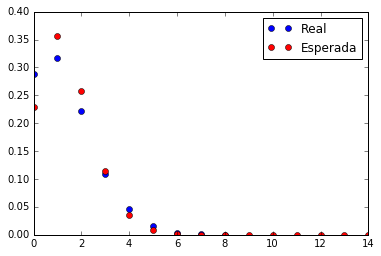

In [31]:
x=carros.Quantidade.value_counts(True)
y=[]

for i in range(15):
    y.append(stats.binom.pmf(i,14,0.1))
plt.plot(x, 'bo')
plt.plot(y,'ro')
plt.legend(['Real','Esperada'])
plt.show()

### <font color='blue'>Para Y<=y</font>

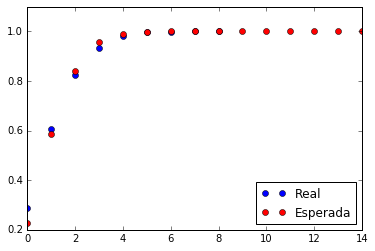

In [47]:
w=(x[0],(x[0]+x[1]),(x[0]+x[1]+x[2]),(x[0]+x[1]+x[2]+x[3]),(x[0]+x[1]+x[2]+x[3]+x[4]),(x[0]+x[1]+x[2]+x[3]+x[4]+x[5]), 
   (x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]),(x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]),(x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]))
z=[]

for i in range(15):
    z.append(stats.binom.cdf(i, 14,0.1))
    
plt.plot(w, 'bo')
plt.plot(z,'ro')
plt.legend(['Real','Esperada'], loc='best')
plt.show()

#### <font color='blue'>O modelo probabilistico funciona muito bem na determinação de variáveis como média, desvio padrão e frequência, e pode fornecer uma estimativa muito aproximada da realidade, por exemplo, para fazer uma estimativa para um período que faltam dados, ou para o futuro.</font>

### e) <font color='blue'>Determinar as variáveis estatísticas com mais facilidade e fazer estimativas bem aproximadas.</font>

### f)

In [32]:
stats.binom.pmf(carros.Quantidade[carros.Tipo=='Popular'], 14, 0.1)
for i in range(15):
    print('Probabilidade de haver', i, 'item em não conformidade: ', stats.binom.pmf(i, 14, 0.1))

Probabilidade de haver 0 item em não conformidade:  0.22876792455
Probabilidade de haver 1 item em não conformidade:  0.355861215966
Probabilidade de haver 2 item em não conformidade:  0.257010878198
Probabilidade de haver 3 item em não conformidade:  0.114227056977
Probabilidade de haver 4 item em não conformidade:  0.034902711854
Probabilidade de haver 5 item em não conformidade:  0.00775615818978
Probabilidade de haver 6 item em não conformidade:  0.00129269303163
Probabilidade de haver 7 item em não conformidade:  0.00016415149608
Probabilidade de haver 8 item em não conformidade:  1.595917323e-05
Probabilidade de haver 9 item em não conformidade:  1.18216098e-06
Probabilidade de haver 10 item em não conformidade:  6.567561e-08
Probabilidade de haver 11 item em não conformidade:  2.65356e-09
Probabilidade de haver 12 item em não conformidade:  7.371e-11
Probabilidade de haver 13 item em não conformidade:  1.26e-12
Probabilidade de haver 14 item em não conformidade:  1e-14


In [12]:
carros.Quantidade[carros.Tipo=='Popular'].value_counts(True)

2    0.295000
1    0.283889
3    0.166667
0    0.149444
4    0.072778
5    0.026111
6    0.004444
7    0.001111
8    0.000556
Name: Quantidade, dtype: float64

#### <font color='blue'>Para a probabilidade de 0,1 os valores se afastam muito do valor que indicam os dados</font>

In [33]:
for i in range(15):
    print('Probabilidade de haver', i, 'item em não conformidade: ', stats.binom.pmf(i, 14, 0.13))

Probabilidade de haver 0 item em não conformidade:  0.142321180258
Probabilidade de haver 1 item em não conformidade:  0.297729365598
Probabilidade de haver 2 item em não conformidade:  0.289173924058
Probabilidade de haver 3 item em não conformidade:  0.172839586793
Probabilidade de haver 4 item em não conformidade:  0.0710231635385
Probabilidade de haver 5 item em não conformidade:  0.0212253132414
Probabilidade de haver 6 item em não conformidade:  0.00475739779549
Probabilidade de haver 7 item em não conformidade:  0.000812429180182
Probabilidade de haver 8 item em não conformidade:  0.000106222780742
Probabilidade de haver 9 item em não conformidade:  1.05815796908e-05
Probabilidade de haver 10 item em não conformidade:  7.9057779299e-07
Probabilidade de haver 11 item em não conformidade:  4.29572050527e-08
Probabilidade de haver 12 item em não conformidade:  1.60472317726e-09
Probabilidade de haver 13 item em não conformidade:  3.68901879829e-11
Probabilidade de haver 14 item em 

#### <font color='blue'>Ajustando a probabilidade para 0,14 os valores se aproximam bastantes do exposto pela realidade.</font>

### Gráfico para o binômio ajustado em p = 0,1

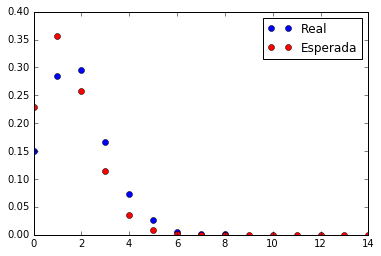

In [39]:
a=carros.Quantidade[carros.Tipo=='Popular'].value_counts(True)
b=[]

for i in range(15):
    b.append(stats.binom.pmf(i, 14,0.1))
    
plt.plot(a, 'bo')
plt.plot(b,'ro')
plt.legend(['Real','Esperada'])
plt.show()

### Gráfico para o binômio ajustado em p = 0,13

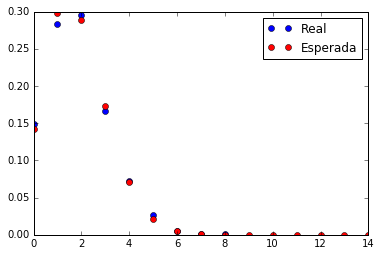

In [36]:
c=carros.Quantidade[carros.Tipo=='Popular'].value_counts(True)
d=[]

for i in range(15):
    d.append(stats.binom.pmf(i, 14,0.13))
    
plt.plot(c, 'bo')
plt.plot(d,'ro')
plt.legend(['Real','Esperada'])
plt.show()